### Notebook 3: CIDI comorbid diagnoses and substance use disorders

Here I calculate odds ratios for cormorbid disorders and substance dependence / abuse data. This data is derived from the CIDI which I extracted from a STATA file. The labels in the excel spreadsheet are quite confusing but there is a folder in the care of Carla/Fiona that has all the cryptic details!

In [9]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [10]:
import pandas as pd
import numpy as np
import csv as csv
from prevalence_functions import *
df  = pd.read_excel('STATA_booklet_LJH.xlsx','original_STATA')

PTSD = df['PTSD12mDummy']

def convert_data(df):
    df = df.values
    df[df == 'yes'] = 1
    df[df == 'True'] = 1
    df[df != 1] = 0
    return df

def sum_diag(df):
    df = convert_data(df)
    out = np.sum(df,axis=1)>0
    out = out.astype(int)
    return out

### Odds Ratios

In [11]:

dep = sum_diag(df[["i_mde12","i_mdeh12","i_mod12","i_modh12","i_mne12","i_mneh12"]])
anx = sum_diag(df[["i_gad12","i_gadh12","i_pat12","i_pds12","i_so12","i_sp12"]])
psy = df["psychosis_conv"].values
sub = sum_diag(df[["i_dra12","i_drah12","i_drd12"]])

alcoho = sum_diag(df[["i_ala12","i_alah12","i_ald12"]])
cannab = sum_diag(df[["i_dra12_mar","i_drah12_mar","i_drd12_mar"]])
amphet = sum_diag(df[["i_dra12_stim","i_drah12_stim","i_drd12_stim"]])
opiate = sum_diag(df[["i_dra12_opi","i_drah12_opi","i_drd12_opi"]])
sedati = sum_diag(df[["i_dra12_sed","i_drah12_sed","i_drd12_sed"]])
otherd = sum_diag(df[["i_dra12_club","i_drah12_club","i_drd12_club",
                     "i_dra12_coc","i_drah12_coc","i_drd12_coc",
                     "i_dra12_hal","i_drah12_hal","i_drd12_hal",
                      "i_dra12_inh","i_drah12_inh","i_drd12_inh",
                      "i_dra12_pain","i_drah12_pain","i_drd12_pain",
                      "i_dra12_oth","i_drah12_oth","i_drd12_oth"]
                    ])

var_labels = ["Anxiety (not PTSD)","Depression","Psychosis","Substance Abuse",
              "Alcoh","Cannab","Ampet","opiate","sedatives","other drugs"]
data = np.stack((anx,dep,psy,sub,alcoho,cannab,amphet,opiate,sedati,otherd),axis=1)

filename = 'Notebook3.csv'

with open(filename,'w') as newFile:
     newFileWriter = csv.writer(newFile)
     newFileWriter.writerow(["Var", "N NoPTSD","% NoPTSD",
                             "N PTSD","% NoPTSD","N Total","% Total",
                             "OR", "LCI","UCI","X2","p"]
                           )
    
results_master(filename,data,var_labels,PTSD)

dataPrint = pd.read_csv(filename,header = 0) # load data
dataPrint.head(len(dataPrint))

,Var,N NoPTSD,% NoPTSD,N PTSD,% NoPTSD.1,N Total,% Total,OR,LCI,UCI,X2,p
0,Anxiety (not PTSD),37.0,66.07,44.0,73.33,81.0,69.83,1.41,0.64,3.13,0.42,0.516
1,Depression,6.0,10.71,24.0,40.00,30.0,25.86,5.56,2.06,14.98,11.47,0.001
2,Psychosis,8.0,15.09,16.0,29.09,24.0,22.22,2.31,0.89,5.97,2.30,0.129
3,Substance Abuse,25.0,44.64,37.0,61.67,62.0,53.45,1.99,0.95,4.18,2.72,0.099
4,Alcoh,16.0,28.57,29.0,48.33,45.0,38.79,2.34,1.08,5.05,3.97,0.046
5,Cannab,9.0,16.07,24.0,40.00,33.0,28.45,3.48,1.44,8.40,7.01,0.008
6,Ampet,20.0,35.71,30.0,50.00,50.0,43.10,1.80,0.85,3.79,1.86,0.172
7,opiate,14.0,25.00,15.0,25.00,29.0,25.00,1.00,0.43,2.32,0.00,1.000
8,sedatives,4.0,7.14,13.0,21.67,17.0,14.66,3.60,1.10,11.80,3.79,0.051
9,other drugs,10.0,17.86,16.0,26.67,26.0,22.41,1.67,0.69,4.08,0.84,0.361


#### Plot results

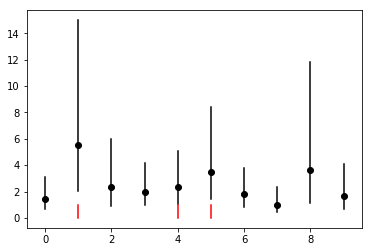

In [12]:
import matplotlib.pyplot as plt

for i in range(0,len(dataPrint)):
    plt.plot([i, i], [dataPrint["LCI"][i], dataPrint["UCI"][i]], 'k-')
    if dataPrint["p"][i] < 0.05:
        plt.plot([i,i],[0,0.95], 'r-')
        
plt.scatter(range(0,len(dataPrint)),dataPrint["OR"],color='k')
plt.show()